In [1]:
# 판다스 정리 2
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv('COVID19.csv', encoding = 'cp949')
df

,구분별,상태별,시점,인원[명],Unnamed: 4
0,전체,신규,2020. 04. 09,39.0,NaN
1,전체,신규,2020. 04. 10,27.0,NaN
2,전체,신규,2020. 04. 11,30.0,NaN
3,전체,신규,2020. 04. 12,32.0,NaN
4,전체,신규,2020. 04. 13,25.0,NaN
...,...,...,...,...,...
9149,검역,신규,2021. 02. 05,7.0,NaN
9150,검역,신규,2021. 02. 06,11.0,NaN
9151,검역,신규,2021. 02. 07,27.0,NaN
9152,검역,신규,2021. 02. 08,9.0,NaN


In [13]:
# a를 b로 바꾸겠다 딕셔너리 key = a value = b
df.rename(columns = {'구분별' : 'Category', '상태별' : 'Type', '시점' : 'Date', '인원[명]' : 'Headcount', 'Unnamed: 4' : 'Unnamed'}, inplace = True)
df.head()

,Category,Type,Date,Headcount,Unnamed
0,전체,신규,2020. 04. 09,39.0,NaN
1,전체,신규,2020. 04. 10,27.0,NaN
2,전체,신규,2020. 04. 11,30.0,NaN
3,전체,신규,2020. 04. 12,32.0,NaN
4,전체,신규,2020. 04. 13,25.0,NaN


In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

,Category,Type,Headcount,Unnamed
Date,,,,
2020-04-09,전체,신규,39.0,NaN
2020-04-10,전체,신규,27.0,NaN
2020-04-11,전체,신규,30.0,NaN
2020-04-12,전체,신규,32.0,NaN
2020-04-13,전체,신규,25.0,NaN
...,...,...,...,...
2021-02-05,검역,신규,7.0,NaN
2021-02-06,검역,신규,11.0,NaN
2021-02-07,검역,신규,27.0,NaN


In [20]:
df.isnull().sum()

Category      0
Type          0
Headcount    55
dtype: int64

In [30]:
# 결측치 보간
# fillna
filled_df = df.fillna(method = 'ffill') # 앞의 값
filled_df
filled_df.isnull().sum()

Category     0
Type         0
Headcount    0
dtype: int64

In [31]:
# 결측치 보간 
# interpolation
interpolated_df = df.interpolate(method = 'linear') # 앞 뒤 사이값
interpolated_df
interpolated_df.isnull().sum()

Category     0
Type         0
Headcount    0
dtype: int64

In [34]:
# 이상한 값 ('Headcount'의 - 값) 없애기
df = df.loc[df['Headcount'] >= 0]
df

,Category,Type,Headcount
Date,,,
2020-04-09,전체,신규,39.0
2020-04-10,전체,신규,27.0
2020-04-11,전체,신규,30.0
2020-04-12,전체,신규,32.0
2020-04-13,전체,신규,25.0
...,...,...,...
2021-02-05,검역,신규,7.0
2021-02-06,검역,신규,11.0
2021-02-07,검역,신규,27.0


In [53]:
# 다운샘플링
downsampled_df = df.resample('M').mean(numeric_only = True)
downsampled_df

,Headcount
Date,
2020-04-30,2.319149
2020-05-31,3.002203
2020-06-30,5.894860
2020-07-31,6.623236
2020-08-31,24.266667
2020-09-30,17.177778
2020-10-31,11.645374
2020-11-30,34.351111
2020-12-31,112.404185


<Axes: xlabel='Date'>

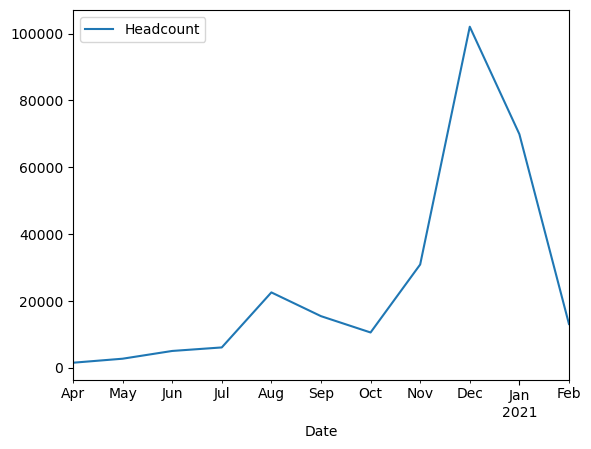

In [38]:
downsampled_df.plot()

In [59]:
# 업샘플링 
# 다시 일별로 펼치면 어떻게 될까
upsampled_df = downsampled_df.resample('D').mean(numeric_only = True) 

upsampled_df.head()

,Headcount
Date,
2020-04-30,2.319149
2020-05-01,NaN
2020-05-02,NaN
2020-05-03,NaN
2020-05-04,NaN


<Axes: xlabel='Date'>

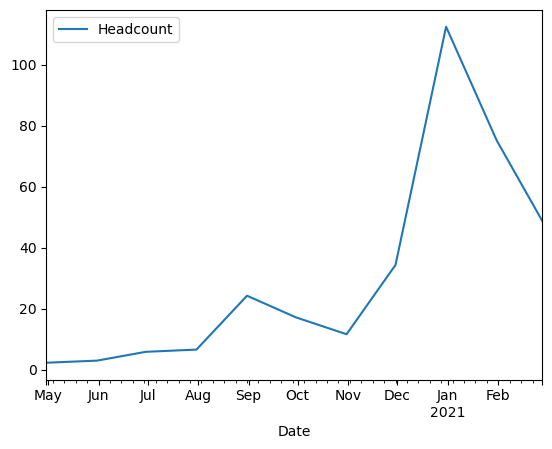

In [72]:
linear_df = upsampled_df.interpolate(method = 'linear')

linear_df.plot()

<Axes: xlabel='Date'>

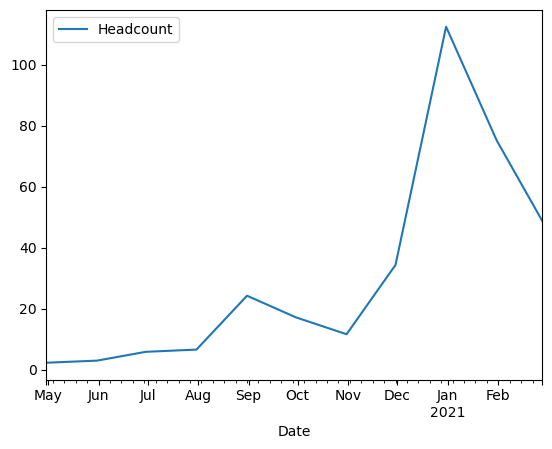

In [71]:
time_df = upsampled_df.interpolate(method = 'time')

time_df.plot()

<Axes: xlabel='Date'>

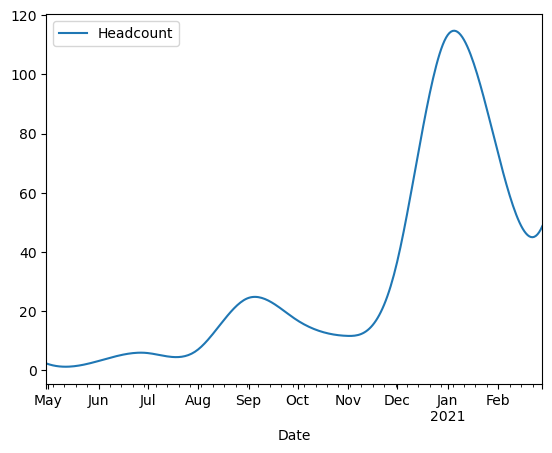

In [70]:
cubic_df = upsampled_df.interpolate(method = 'cubic')

cubic_df.plot()

<Axes: xlabel='Date'>

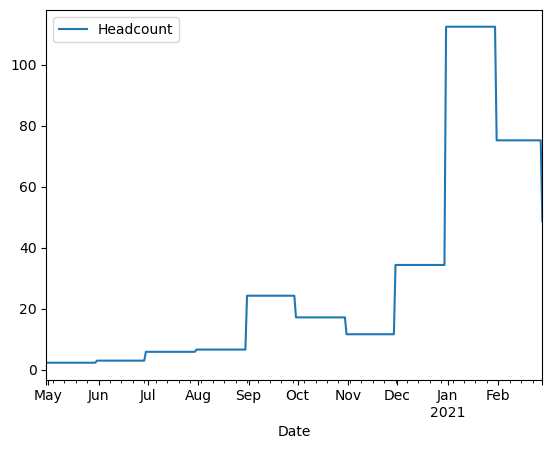

In [69]:
pad_df = upsampled_df.interpolate(method = 'pad')

pad_df.plot()

<Axes: xlabel='Date'>

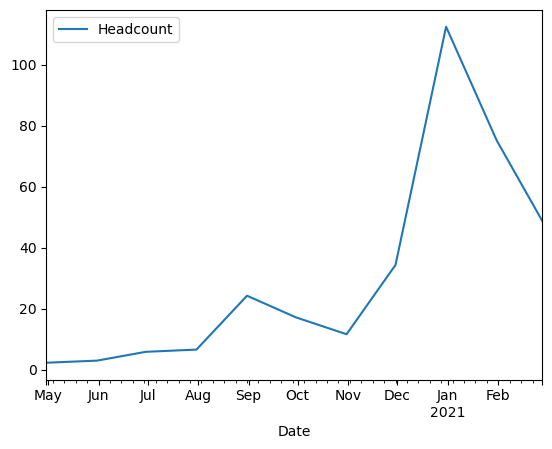

In [68]:
index_df = upsampled_df.interpolate(method = 'index')

index_df.plot()

<Axes: xlabel='Date'>

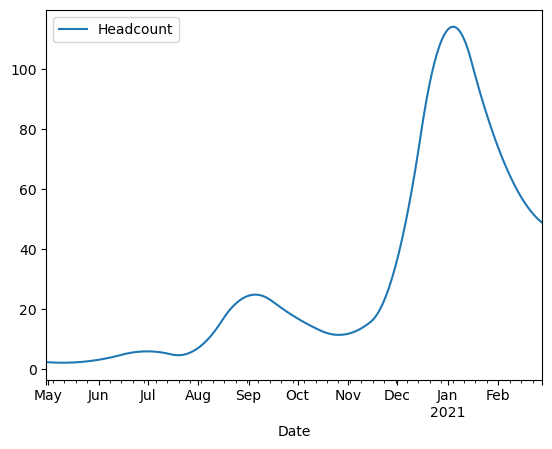

In [67]:
quadratic_df = upsampled_df.interpolate(method = 'quadratic')

quadratic_df.plot()

<Axes: xlabel='Date'>

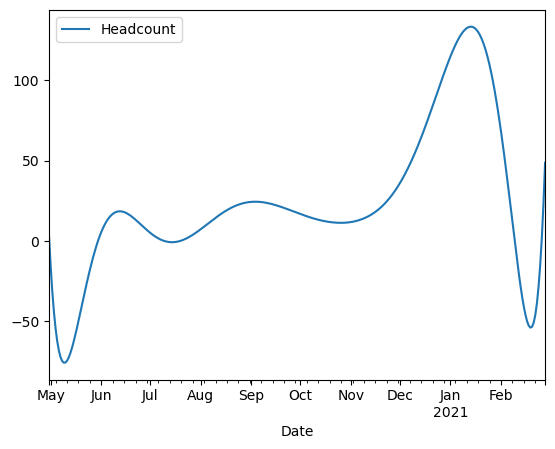

In [73]:
barycentric_df = upsampled_df.interpolate(method = 'barycentric')

barycentric_df.plot()

<Axes: xlabel='Date'>

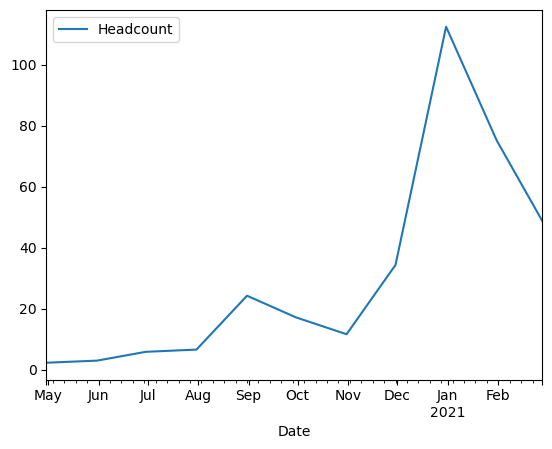

In [75]:
slinear_df = upsampled_df.interpolate(method = 'slinear')

slinear_df.plot()

<Axes: xlabel='Date'>

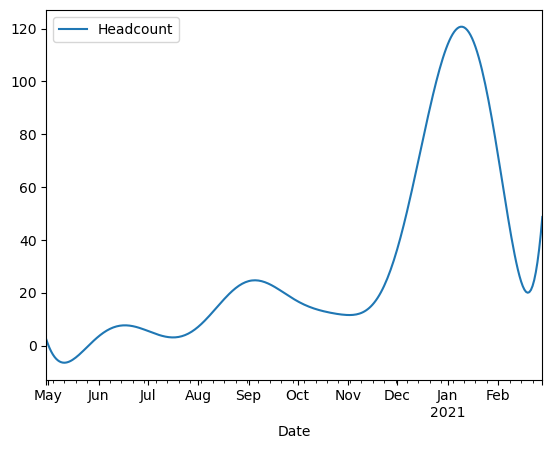

In [76]:
polynomial_df = upsampled_df.interpolate(method = 'polynomial', order=5)

polynomial_df.plot()

<Axes: xlabel='Date'>

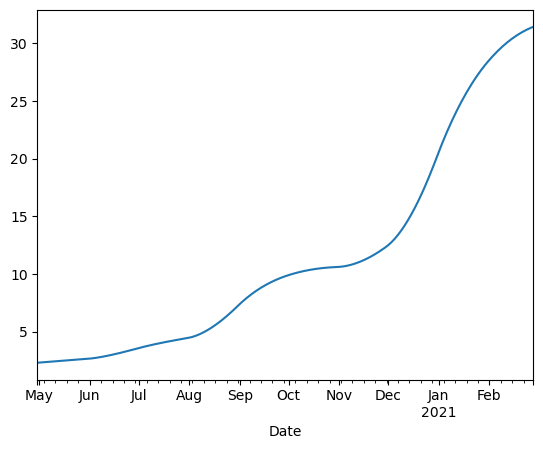

In [78]:
# 확장 윈도우 Expading

expanding_mean = linear_df['Headcount'].expanding().mean()

expanding_mean.plot()

In [80]:
# 데이터 확장 
data = {'value' : [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

df['expanding sum'] = df['value'].expanding().sum() # 앞의 값과 더한다 (누적)

df

,value,expanding sum
0,1,1.0
1,2,3.0
2,3,6.0
3,4,10.0
4,5,15.0
